<a href="https://colab.research.google.com/github/Vy-X-S/sales_analytics/blob/main/exploratory_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

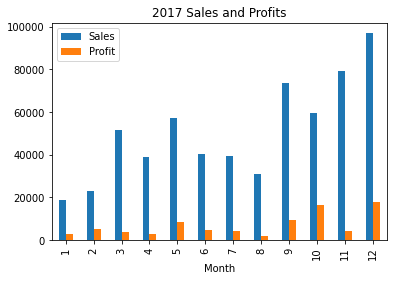

2017 Sales: 609206.0
2017 Q4 Sales: 609206.0
****************************************


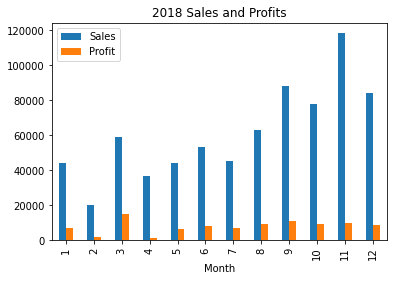

2018 Sales: 733215.0
2018 Q4 Sales: 733215.0
****************************************


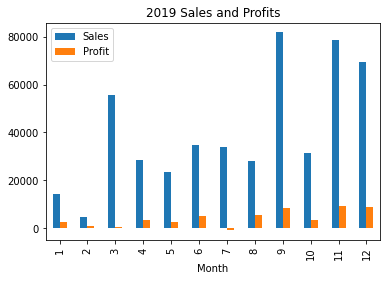

2019 Sales: 484247.0
2019 Q4 Sales: 484247.0
****************************************


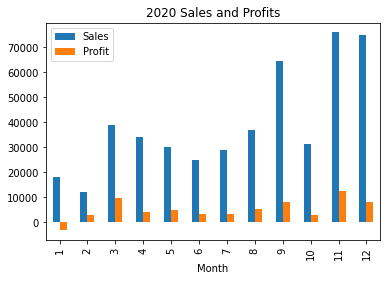

2020 Sales: 470533.0
2020 Q4 Sales: 470533.0
****************************************


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

xl = pd.ExcelFile("/content/TableauSalesData.xlsx")
SalesData = xl.parse("Orders")

#GOAL IS INCREASE SALES AND PROFITS AND CORPORATE ACCOUNTS Q4: OCT 1 - DEC 31
# METHOD 1: Increase Cart Value And Purchase Frequency.  Focus On Existing Customers
# METHOD 2: Upsell An Additional Service

#start with list of products, find complementary
# Holidays are Halloween (10-31-2020), Black Friday (11-27-2020), Thanksgiving (11-26-2021), Christmas (12-25-2021), New Years  (12-31-2021)
salesdata_copy = SalesData.copy()
salesdata_copy["Month"] = salesdata_copy["Order Date"].dt.month
salesdata_copy["Year"] = salesdata_copy["Order Date"].dt.year
Months = salesdata_copy.Month.unique()
Years = salesdata_copy.Year.unique()
total_salesdata_copy = salesdata_copy[["Category", "Sub-Category", "Sales", "Profit", "Year", "Month"]]

for year in Years:
  JustYear = total_salesdata_copy.loc[total_salesdata_copy["Year"] == year]
  JustQ4 = JustYear.loc[JustYear["Month"] > 0]
  JustQ4sales_profits = JustQ4[["Sales", "Profit", "Month"]]
  JustQ4sales_profits_total = JustQ4sales_profits.groupby(by="Month").sum()
  JustQ4sales_profits_total.reset_index()

  JustQ4sales_profits_total.plot.bar()
  plt.title(str(year) + " Sales and Profits")
  plt.show()
  print(str(year) + " Sales: " + str(JustYear["Sales"].sum().round()))
  print(str(year) + " Q4 Sales: " + str(JustQ4sales_profits_total["Sales"].sum().round()))
  print("*"*40)


# From above data, we can see Q4 has the highest sales and profits all time (2017-2020)
# In order to increase sales and profits for Q4 2021, we can now observe factors of profit and sales
# FACTORS OF SALES
# SALE GOAL 2021: 564,639 OR SALE GOAL 2021 Q4: 218,756
# ---> Q4 accounts for almost 40% of sales in the year
# -- Upselling and cross-selling to customers
# -- Discounts on popular items / Rewards programs
# -- Increase purchase frequency and value of carts

# Factors of PROFITS
# -- profit = REVENUE - EXPENSES
# -- reduce discounts on unprofitable products
# -- drive sales to increase profits from popular items
# -- PROOF: Increase sales = increase profits?

PARAMETER: scope include Q4
# Factors of CORPORATE ACCOUNTS
# Create RFM table for corporate account
# Build outreach program for new corporate accounts and existing corporate accounts

In [ ]:
import scipy.stats

# Find most popular categories and sub categories throughout Q4
total_salesdata_copy = salesdata_copy[["Category", "Sub-Category", "Sales", "Profit", "Year", "Month", "Discount"]]

for year in Years:
  JustYear = total_salesdata_copy.loc[total_salesdata_copy["Year"] == year]
  NoYear = JustYear[["Category", "Sub-Category", "Sales", "Profit", "Month", "Discount"]]
  JustQ4 = NoYear.loc[JustYear["Month"] > 9]
  JustQ4Cat_sales = JustQ4[["Category", "Sub-Category", "Sales", "Profit", "Discount"]]
  JustQ4Cat_sales["Discount"] = (JustQ4Cat_sales["Discount"] * 100)
  JustQ4sales_disc_profit = JustQ4Cat_sales.groupby(by="Sub-Category").agg({"Sales":'sum', "Profit":'sum', "Discount":'mean'}).sort_values(by="Sales",ascending=False)
  #JustQ4sales_profits_total = JustQ4Cat_sales.groupby(by="Sub-Category").sum().sort_values(by="Sales", ascending=False)

  #Locate P value
  x = JustQ4sales_disc_profit["Discount"]
  y = JustQ4sales_disc_profit["Sales"]
  GetCorrelation = scipy.stats.spearmanr(x, y)
  Corr = GetCorrelation[0]
  CorrRounded = str(Corr.round(2))
  pValue = GetCorrelation[1]
  pValueRounded = str(pValue.round(5))

  print("\n" + str(year))
  #AGGREGATE OF SALES AND PROFITS WITHIN Q4 FROM 2017 - 2020
  print(JustQ4sales_disc_profit.head(3))
  print("The correlation between Discounts and Sales is: " + CorrRounded )
  print("At p value: " + pValueRounded)
  print("*"*40)


2017
                  Sales      Profit   Discount
Sub-Category                                  
Chairs        34034.594   2881.5156  16.969697
Binders       28849.521  10488.8960  32.451613
Copiers       26579.780  12161.9082  12.000000
The correlation between Discounts and Sales is: 0.54
At p value: 0.02394
****************************************

2018
                  Sales     Profit   Discount
Sub-Category                                 
Phones        35223.834  5504.9007  16.635514
Chairs        34197.110  2871.8747  16.756757
Tables        33794.707 -4530.3769  25.784314
The correlation between Discounts and Sales is: 0.58
At p value: 0.015
****************************************

2019
                  Sales     Profit   Discount
Sub-Category                                 
Phones        35642.036  4359.0339  18.055556
Chairs        31004.133  2607.9927  16.727273
Storage       20959.566  1749.0750   8.157895
The correlation between Discounts and Sales is: 0.36
At p val

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

IS THERE A RELATIONSHIP BETWEEN DISCOUNTS AND SALES? -- COMPARING ART TO APPLIANCES, THIS RELATIONSHIP IS INCONCLUSIVE

Here the R value is between 0.2 to 0.4 which indicates a **RELATIVELY WEAK CORRELATION**



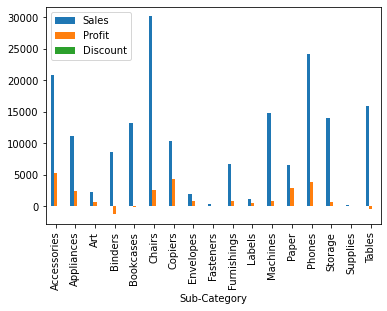

In [ ]:
JustQ4sales_disc_profit.plot.bar()
plt.show()

PARSE CUSTOMERS AND ORDERS.
FOR EACH CUSTOMER ORDER, LOG EACH PRODUCT ORDERED. IF A AND B BOUGHT TOGETHER INCREASE A LIKELIHOOD BOUGHT WITH B BY 1 ETC. CONTINUE FOR EACH
RETURN NEW DATAFRAME, EACH PRODUCT HAS A TOP ITEM BOUGHT
A: 44% B, 33% C, 25% D, 65% E
B: 44% A, 27% C, 67% D, 34% E
C: 33% A, 27%, 45% D, 50% E
D: ....
E: ....

In [ ]:
salesdata_copy = SalesData.copy()
salesdata_copy["Year"] = salesdata_copy["Order Date"].dt.year
Years = salesdata_copy.Year.unique()
customer_data = salesdata_copy[["Customer Name", "Sales", "Order Date", "Year"]]
#RFM
# RECENT = Return most recent customer order date
# FREQUENCY = Return average # of transactions a year
# MONETARY = Return total or average order amount

# MANUALLY INPUT YEAR
year = 2020
_date = datetime.datetime(2020,12,31)

customer_data_year = customer_data.loc[customer_data["Year"] == year] # find only in year
customer_data_noyear = customer_data_year[["Customer Name", "Sales", "Order Date"]] # find without year column

# INITIALIZE DF AND CALCUALTE M KEY FOR RFM
customer_data_total = customer_data_noyear.groupby(by="Customer Name").agg({"Sales":'sum',"Order Date":'max'})
m_conditions = [
    (customer_data_total["Sales"] <= 100),
    (customer_data_total["Sales"] <= 500),
    (customer_data_total["Sales"] <= 1000),
    (customer_data_total["Sales"] <= 4000),
    (customer_data_total["Sales"] > 4000)
]
m_score = [1,2,3,4,5]
customer_data_total["key_M"] = np.select(m_conditions, m_score)

# CALCULATE R KEY FOR RFM
customer_data_total["Recent"] = ((_date - customer_data_total["Order Date"]).dt.days)
r_conditions = [
    (customer_data_total["Recent"] <= 90), # in Days
    (customer_data_total["Recent"] <= 180),
    (customer_data_total["Recent"] <= 365),
    (customer_data_total["Recent"] <= 720),
    (customer_data_total["Recent"] > 720)
]
r_score = [5,4,3,2,1]
customer_data_total["key_R"] = np.select(r_conditions, r_score)

# CALCULATE F KEY FOR RFM
customer_data_total["Frequency"] = customer_data_noyear.pivot_table(columns=['Customer Name'], aggfunc='size')
f_conditions = [
    (customer_data_total["Frequency"] <= 5),
    (customer_data_total["Frequency"] <= 10),
    (customer_data_total["Frequency"] <= 15), # Shopped and PURCHASED on average once a month
    (customer_data_total["Frequency"] <= 20),
    (customer_data_total["Frequency"] > 20)
]
f_score = [1,2,3,4,5]
customer_data_total["key_F"] = np.select(f_conditions, f_score)

# CONCATENATE KEYS FOR RFM
customer_data_total["RFM"] = customer_data_total["key_R"].astype(str) + customer_data_total["key_F"].astype(str) + customer_data_total["key_M"].astype(str)

# SPECIAL FILTERS
customer_data_filter = customer_data_total.loc[customer_data_total["key_F"] >= 3]

# DROP UNNECESSARY COLUMNS FOR DISPLAY
customer_data_total.drop("key_R", axis=1, inplace=True)
customer_data_total.drop("key_F", axis=1, inplace=True)
customer_data_total.drop("key_M", axis=1, inplace=True)
customer_data_total.drop("Recent", axis=1, inplace=True)
customer_data_total.drop("Frequency", axis=1, inplace=True)
customer_data_total.drop("Sales", axis=1, inplace=True)
customer_data_total.drop("Order Date", axis=1, inplace=True)

print("\n" + str(year))
#print(customer_data_total.sort_values(by="Sales",ascending=False).head(50))
display(customer_data_total)
display(customer_data_filter)
print(customer_data_total.describe())


2020


,RFM
Customer Name,
Aaron Hawkins,513
Adam Bellavance,411
Adam Hart,511
Adam Shillingsburg,514
Adrian Barton,523
...,...
William Brown,523
Xylona Preis,511
Yana Sorensen,514


,Sales,Order Date,key_M,Recent,key_R,Frequency,key_F,RFM
Customer Name,,,,,,,,
Andrew Gjertsen,2223.183,2020-11-11,4,50,5,16,4,544
Anna Häberlin,1945.842,2020-12-31,4,0,5,13,3,534
Dave Hallsten,2622.700,2020-06-13,4,201,3,11,3,334
David Bremer,2201.554,2020-12-27,4,4,5,12,3,534
Frank Atkinson,1037.358,2020-10-30,4,62,5,11,3,534
Giulietta Baptist,3695.992,2020-09-21,4,101,4,11,3,434
Irene Maddox,1841.608,2020-12-11,4,20,5,11,3,534
Karl Braun,627.572,2020-07-02,3,182,3,13,3,333
Keith Dawkins,7039.044,2020-12-14,5,17,5,13,3,535


        RFM
count   573
unique   30
top     512
freq     83


https://prnt.sc/mrpF1C8tcn0Y RFM Reading


TOP 5 SALES WERE IN Q4? (10-12)
https://prnt.sc/xvwL5CKThKTb --- 60% were in Q4


*   AVERAGE SALE IN YEAR WAS $821.00
*   16 customers shop on average once a month and 12/16 (75%) of which repurchased in Q4 and each customer average in sale 2800+


